In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
movies = pd.read_csv('../input/netflix-original-films-imdb-scores/NetflixOriginals.csv')
movies.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [5]:
movies.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [6]:
movies.describe(include='object')

,Title,Genre,Premiere,Language
count,584,584,584,584
unique,584,115,390,38
top,Loudon Wainwright III: Surviving Twin,Documentary,"October 2, 2020",English
freq,1,159,6,401


In [7]:
movies['Premiere']=pd.to_datetime(movies['Premiere'], dayfirst=True)
movies.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi


In [8]:
movies.Language.unique()

array(['English/Japanese', 'Spanish', 'Italian', 'English', 'Hindi',
       'Turkish', 'Korean', 'Indonesian', 'Malay', 'Dutch', 'French',
       'English/Spanish', 'Portuguese', 'Filipino', 'German', 'Polish',
       'Norwegian', 'Marathi', 'Thai', 'Swedish', 'Japanese',
       'Spanish/Basque', 'Spanish/Catalan', 'English/Swedish',
       'English/Taiwanese/Mandarin', 'Thia/English', 'English/Mandarin',
       'Georgian', 'Bengali', 'Khmer/English/French', 'English/Hindi',
       'Tamil', 'Spanish/English', 'English/Korean', 'English/Arabic',
       'English/Russian', 'English/Akan', 'English/Ukranian/Russian'],
      dtype=object)

In [9]:
movies.Genre.unique()

array(['Documentary', 'Thriller', 'Science fiction/Drama',
       'Horror thriller', 'Mystery', 'Action', 'Comedy',
       'Heist film/Thriller', 'Musical/Western/Fantasy', 'Drama',
       'Romantic comedy', 'Action comedy', 'Horror anthology',
       'Political thriller', 'Superhero-Comedy', 'Horror',
       'Romance drama', 'Anime / Short', 'Superhero', 'Heist', 'Western',
       'Animation/Superhero', 'Family film', 'Action-thriller',
       'Teen comedy-drama', 'Romantic drama', 'Animation',
       'Aftershow / Interview', 'Christmas musical',
       'Science fiction adventure', 'Science fiction', 'Variety show',
       'Comedy-drama', 'Comedy/Fantasy/Family', 'Supernatural drama',
       'Action/Comedy', 'Action/Science fiction',
       'Romantic teenage drama', 'Comedy / Musical', 'Musical',
       'Science fiction/Mystery', 'Crime drama',
       'Psychological thriller drama', 'Adventure/Comedy', 'Black comedy',
       'Romance', 'Horror comedy', 'Christian musical',
       'Rom

### We have examined what data is, now it needs to be transformed in order to consider it in more detail.

Converting the date

In [10]:
movies['Year'] = movies['Premiere'].apply(lambda x: x.year)

months = {1: 'January', 2: 'February', 3: 'March', 4: 'April',
         5: 'May', 6: 'June', 7: 'July', 8: 'August',
         9: 'September', 10: 'October', 11: 'November', 12: 'December'}
movies['Month'] = movies['Premiere'].apply(lambda x: months[x.month])

movies['Day'] = movies['Premiere'].apply(lambda x: x.day)

In [11]:
movies = movies.drop('Premiere', axis=1)
movies.head()

,Title,Genre,Runtime,IMDB Score,Language,Year,Month,Day
0,Enter the Anime,Documentary,58,2.5,English/Japanese,2019,August,5
1,Dark Forces,Thriller,81,2.6,Spanish,2020,August,21
2,The App,Science fiction/Drama,79,2.6,Italian,2019,December,26
3,The Open House,Horror thriller,94,3.2,English,2018,January,19
4,Kaali Khuhi,Mystery,90,3.4,Hindi,2020,October,30


In [12]:
movies['Year'].value_counts()

2020    183
2019    125
2018     99
2021     71
2017     66
2016     30
2015      9
2014      1
Name: Year, dtype: int64

In [13]:
print(movies.groupby('Year')['IMDB Score'].min())
print(movies.groupby('Year')['IMDB Score'].mean())
print(movies.groupby('Year')['IMDB Score'].max())

Year
2014    6.4
2015    4.8
2016    4.2
2017    4.4
2018    3.2
2019    2.5
2020    2.6
2021    4.1
Name: IMDB Score, dtype: float64
Year
2014    6.400000
2015    6.877778
2016    6.513333
2017    6.422727
2018    6.360606
2019    6.259200
2020    6.195082
2021    6.046479
Name: IMDB Score, dtype: float64
Year
2014    6.4
2015    8.4
2016    8.2
2017    8.3
2018    8.5
2019    8.3
2020    9.0
2021    8.2
Name: IMDB Score, dtype: float64


In [14]:
movies['Genre'].value_counts().head(10)

Documentary        159
Drama               77
Comedy              49
Romantic comedy     39
Thriller            33
Comedy-drama        14
Crime drama         11
Biopic               9
Horror               9
Action               7
Name: Genre, dtype: int64

In [15]:
movies['Language'].value_counts().head(10)

English            401
Hindi               33
Spanish             31
French              20
Italian             14
Portuguese          12
Indonesian           9
Japanese             6
Korean               6
English/Spanish      5
Name: Language, dtype: int64

In [16]:
movies[movies['IMDB Score'] >= 8].value_counts()

Title                                         Genre                                 Runtime  IMDB Score  Language                  Year  Month      Day
13th                                          Documentary                           100      8.2         English                   2016  October    7      1
My Octopus Teacher                            Documentary                           85       8.1         English                   2020  September  7      1
The Three Deaths of Marisela Escobedo         Documentary                           109      8.2         Spanish                   2020  October    14     1
Taylor Swift: Reputation Stadium Tour         Concert Film                          125      8.4         English                   2018  December   31     1
Struggle: The Life and Lost Art of Szukaiski  Documentary                           105      8.0         English                   2018  December   21     1
Springsteen on Broadway                       One-man show     

In [17]:
movies[movies['Runtime'] >= 120].value_counts()

Title                           Genre                   Runtime  IMDB Score  Language    Year  Month      Day
15 August                       Comedy-drama            124      5.8         Marathi     2019  March      29     1
The Girl on the Train           Thriller                120      4.4         Hindi       2021  February   26     1
The Edge of Democracy           Documentary             121      7.2         Portuguese  2019  June       19     1
The Disciple                    Drama                   129      7.2         Marathi     2021  April      30     1
The Devil All the Time          Psychological thriller  138      7.1         English     2020  September  16     1
                                                                                                                ..
It Takes a Lunatic              Documentary             126      6.6         English     2019  October    25     1
Icarus                          Documentary             120      7.9         English 

In [18]:
movies[movies['Runtime'] <= 60].value_counts()

Title                                                   Genre                  Runtime  IMDB Score  Language          Year  Month      Day
13th: A Conversation with Oprah Winfrey & Ava DuVernay  Aftershow / Interview  36       7.1         English           2017  January    26     1
ReMastered: Devil at the Crossroads                     Documentary            48       7.0         English           2019  April      26     1
Rodney King                                             One-man show           52       5.8         English           2017  April      28     1
Rocko's Modern Life: Static Cling                       Animation / Comedy     45       7.0         English           2019  August     9      1
Resurface                                               Documentary            27       7.0         English           2017  September  1      1
                                                                                                                                             

In [19]:
movies['IMDB Score'].value_counts()

6.3    30
5.8    30
7.1    28
6.4    28
6.5    26
6.7    25
6.8    24
6.1    24
7.3    21
7.2    20
5.7    20
7.0    19
6.9    19
5.2    19
5.5    19
6.6    18
6.2    18
5.9    16
5.6    15
5.4    13
6.0    13
7.4    12
7.6    10
5.3    10
7.5    10
7.7     8
4.6     8
4.8     7
4.7     6
5.1     6
4.4     6
8.2     5
5.0     5
4.3     4
7.9     4
4.5     4
4.9     4
4.1     4
7.8     3
8.1     3
8.4     3
3.7     2
2.6     2
4.2     2
8.3     2
3.4     1
8.0     1
8.6     1
9.0     1
2.5     1
3.2     1
8.5     1
3.5     1
3.9     1
Name: IMDB Score, dtype: int64

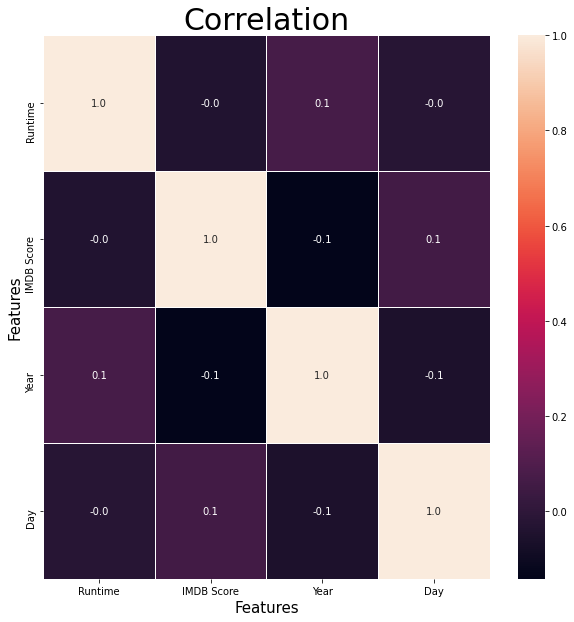

In [20]:
_, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(movies.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax)

plt.title('Correlation', fontsize = 30)
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


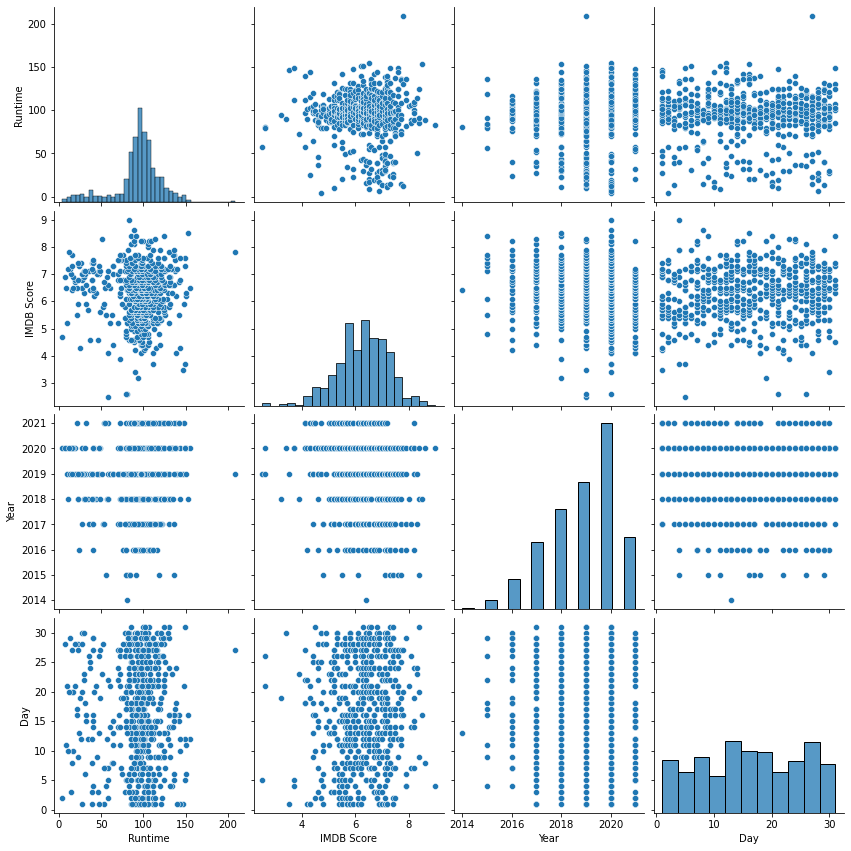

In [21]:
sns.pairplot(movies, size = 3)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


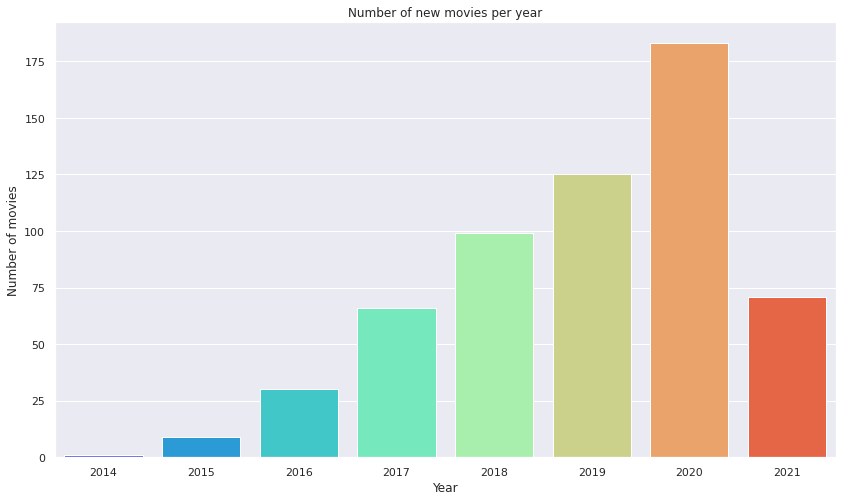

In [22]:
sns.set(rc={'figure.figsize':(14, 8)})

ax = sns.countplot(movies['Year'], palette='rainbow')
ax.set_title('Number of new movies per year')
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.show()

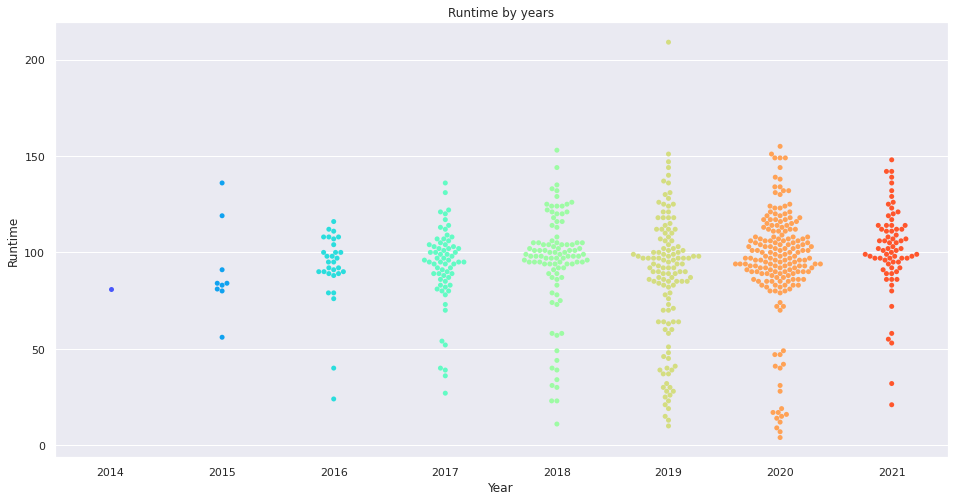

In [23]:
sns.set(rc={'figure.figsize':(16, 8)})


ax = sns.swarmplot(x='Year',y='Runtime',data=movies,palette='rainbow')
ax.set_title('Runtime by years')
plt.xlabel('Year')
plt.ylabel('Runtime')
plt.show()

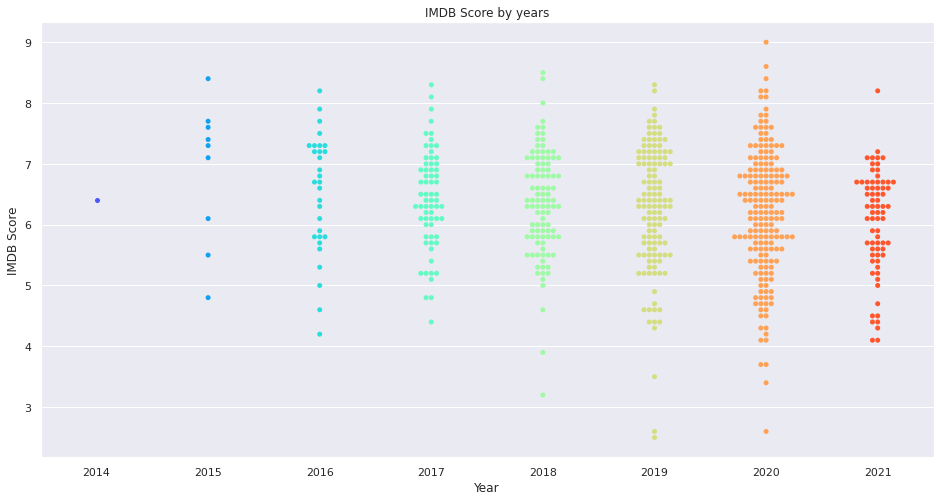

In [24]:
sns.set(rc={'figure.figsize':(16, 8)})


ax = sns.swarmplot(x='Year',y='IMDB Score',data=movies,palette='rainbow')
ax.set_title('IMDB Score by years')
plt.xlabel('Year')
plt.ylabel('IMDB Score')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


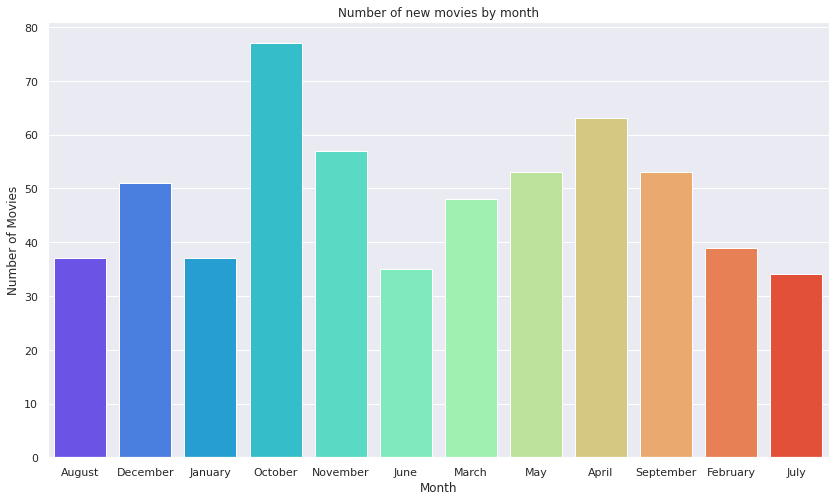

In [25]:
sns.set(rc={'figure.figsize':(14, 8)})

ax = sns.countplot(movies['Month'], palette='rainbow')
ax.set_title('Number of new movies by month')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


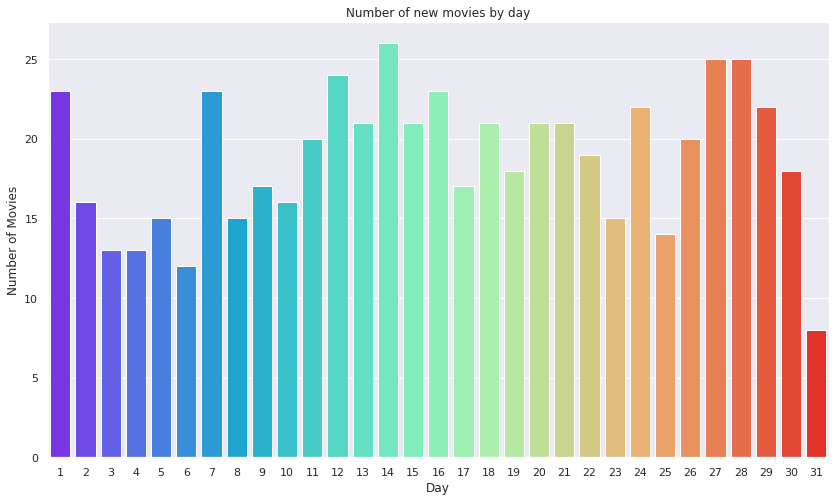

In [26]:
sns.set(rc={'figure.figsize':(14, 8)})

ax = sns.countplot(movies['Day'], palette='rainbow')
ax.set_title('Number of new movies by day')
plt.xlabel('Day')
plt.ylabel('Number of Movies')
plt.show()

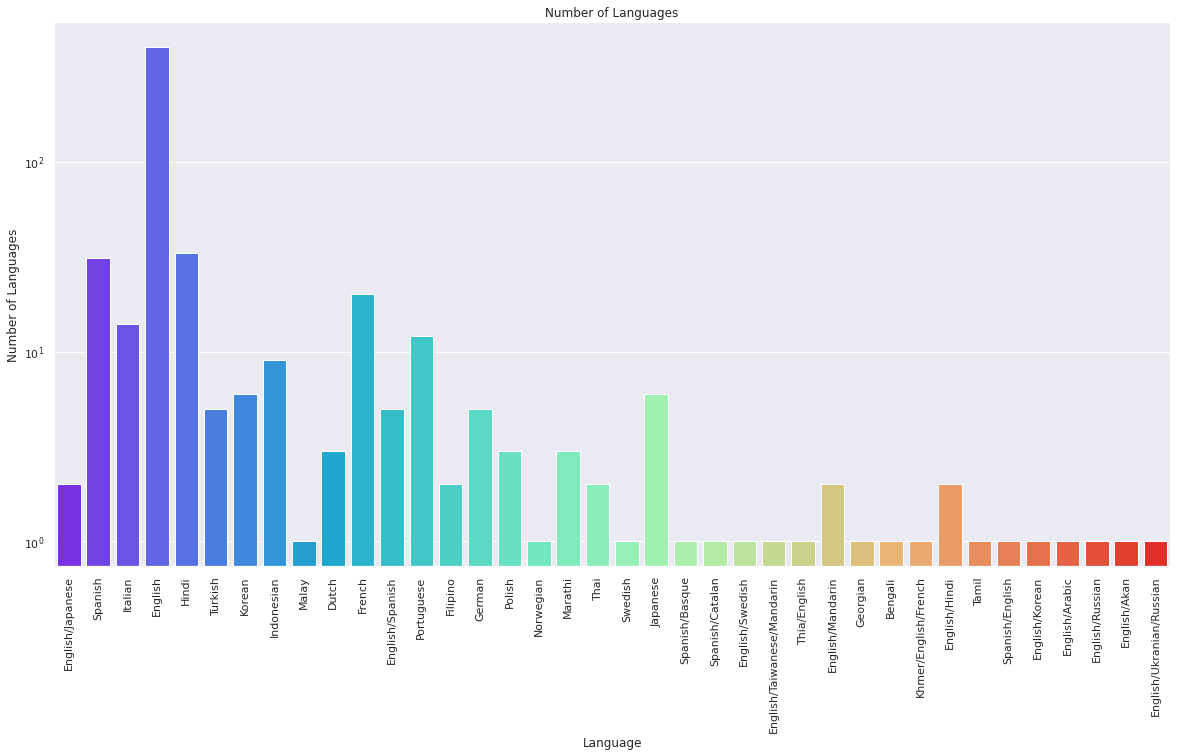

In [27]:
sns.set(rc={'figure.figsize':(20, 10)})

sns.countplot(x=movies['Language'], log=True, palette='rainbow')
plt.xticks(rotation=90)

plt.title('Number of Languages')
plt.xlabel('Language')
plt.ylabel('Number of Languages')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 49.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 68.8% of the points cannot be placed; y

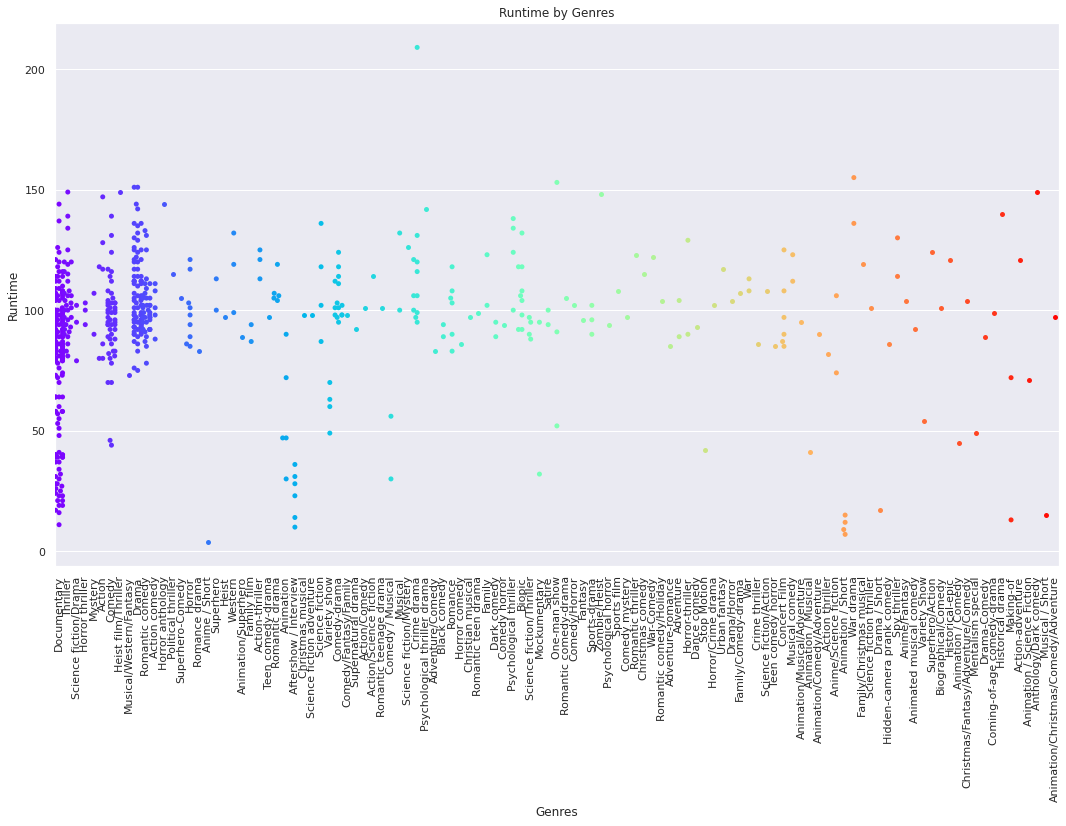

In [28]:
sns.set(rc={'figure.figsize':(18, 10)})


ax = sns.swarmplot(x='Genre', y='Runtime', data=movies, palette='rainbow')
ax.set_title('Runtime by Genres')

plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Runtime')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 78.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 53.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 63.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 46.2% of the points cannot be placed; y

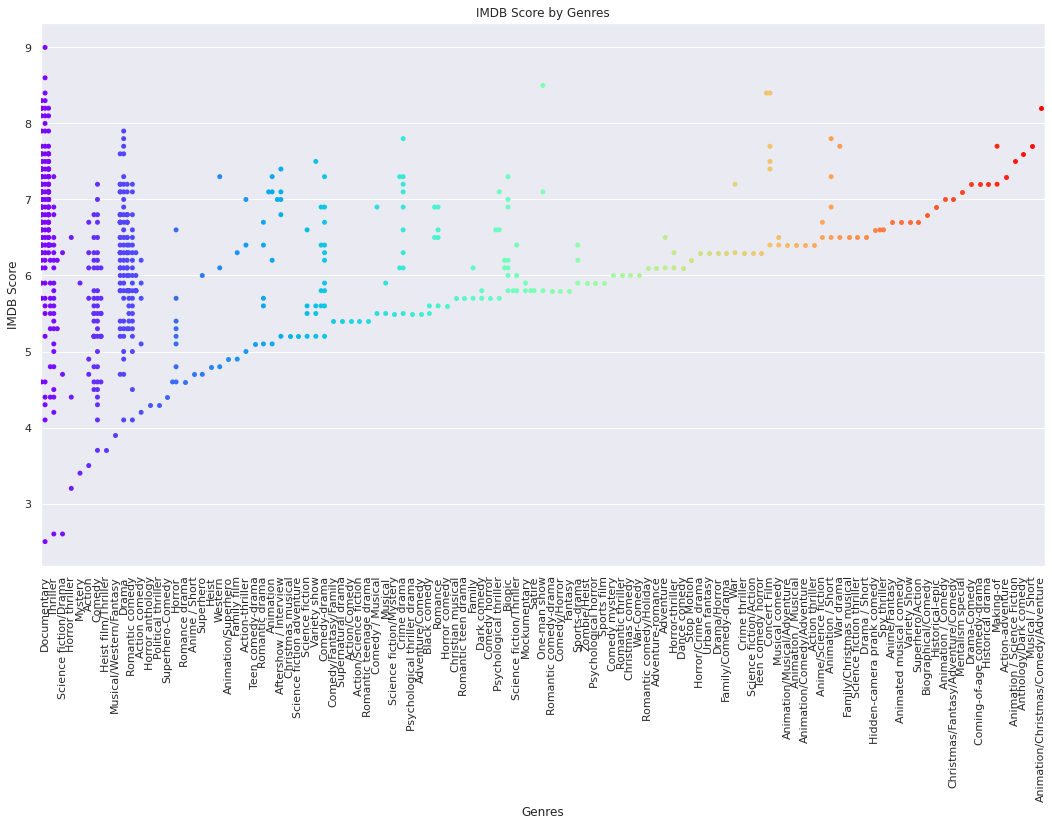

In [29]:
sns.set(rc={'figure.figsize':(18, 10)})


ax = sns.swarmplot(x='Genre', y='IMDB Score', data=movies, palette='rainbow')
ax.set_title('IMDB Score by Genres')

plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('IMDB Score')
plt.show()

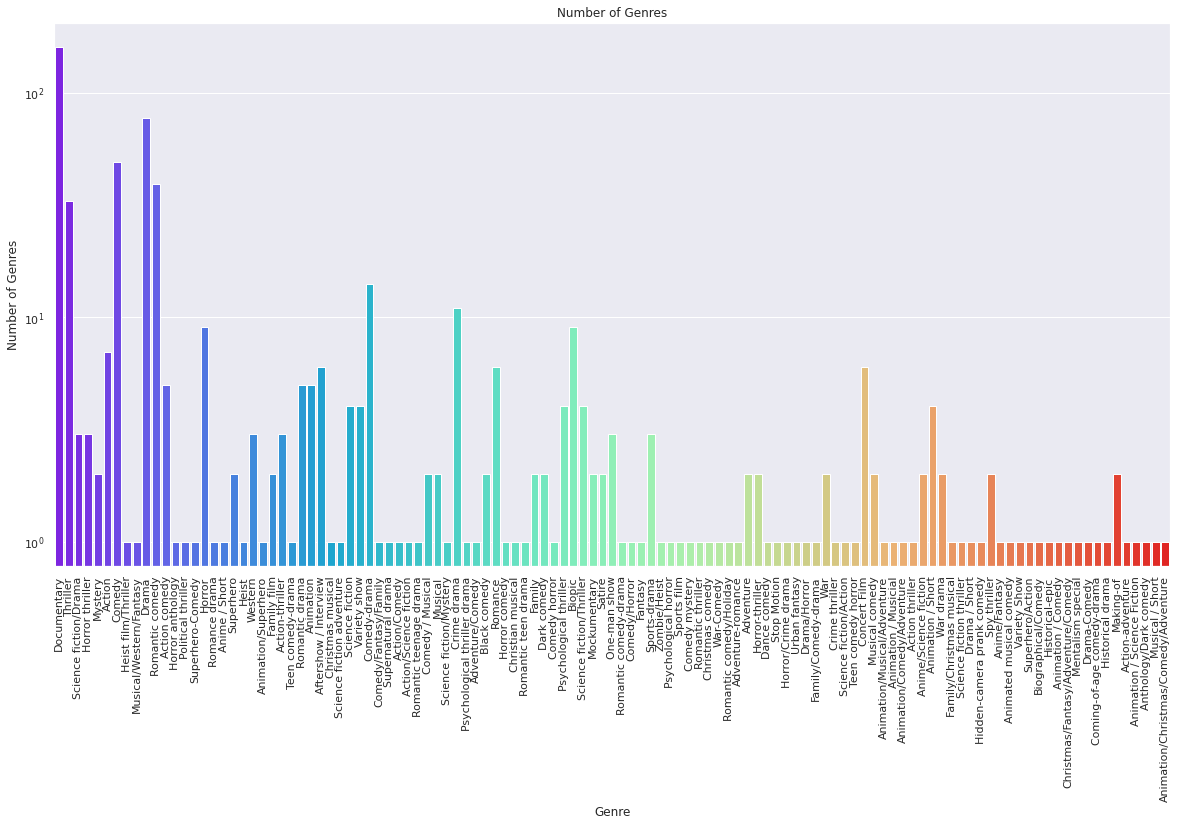

In [30]:
sns.set(rc={'figure.figsize':(20, 10)})

sns.countplot(x=movies['Genre'], log=True, palette='rainbow')
plt.xticks(rotation=90)

plt.title('Number of Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Genres')
plt.show()

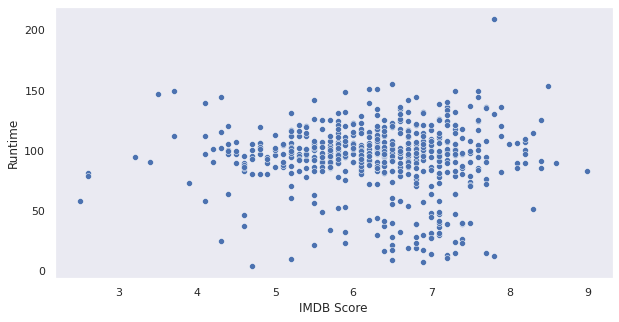

In [31]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=movies['IMDB Score'], y=movies['Runtime'])
plt.grid()

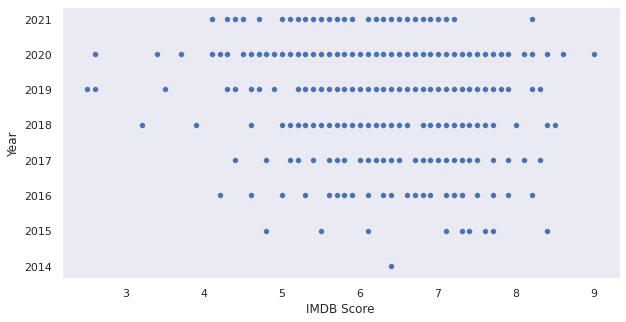

In [32]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=movies['IMDB Score'], y=movies['Year'])
plt.grid()

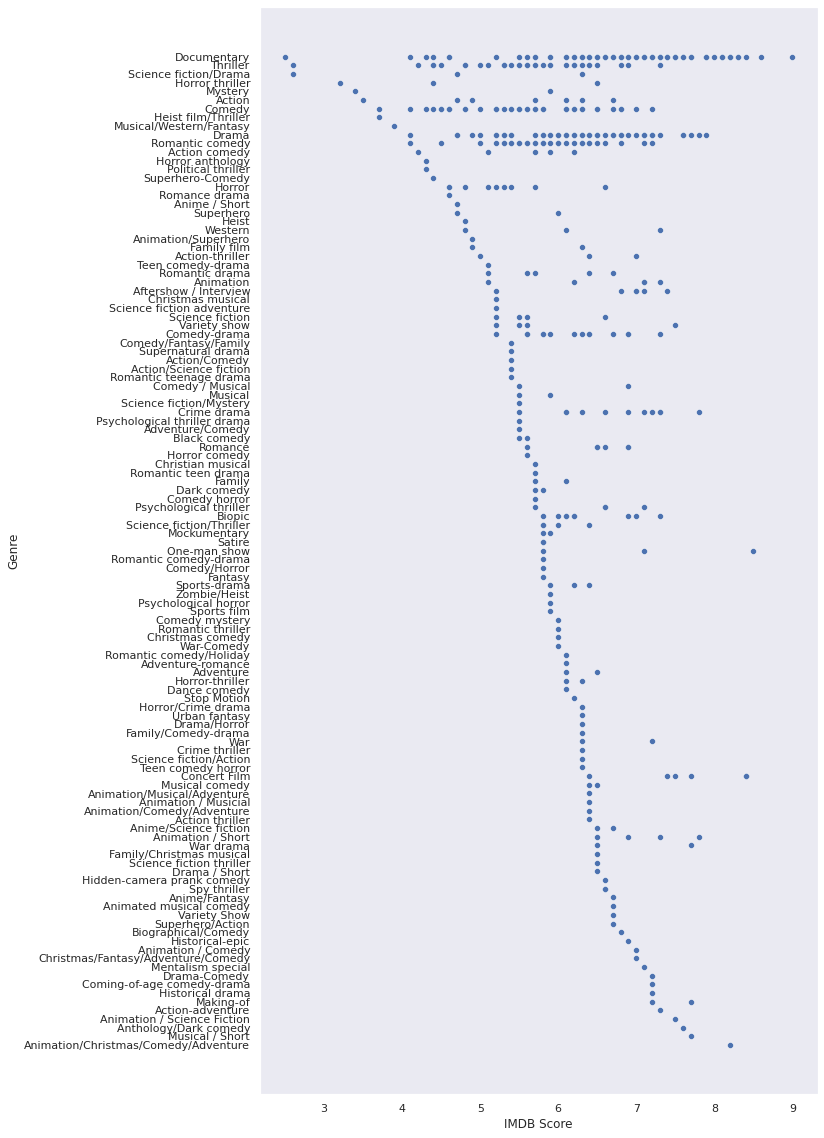

In [33]:
plt.figure(figsize=(10,20))
sns.scatterplot(x=movies['IMDB Score'], y=movies['Genre'])
plt.grid()

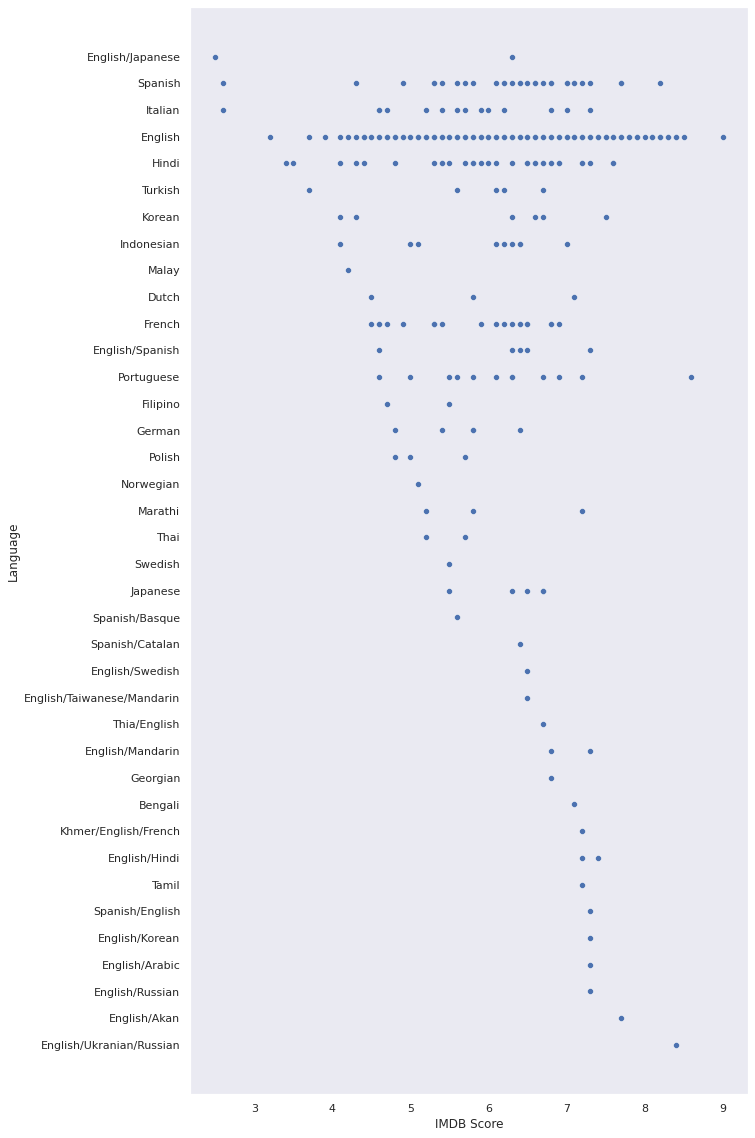

In [34]:
plt.figure(figsize=(10,20))
sns.scatterplot(x=movies['IMDB Score'], y=movies['Language'])
plt.grid()

<AxesSubplot:xlabel='Year', ylabel='Runtime'>

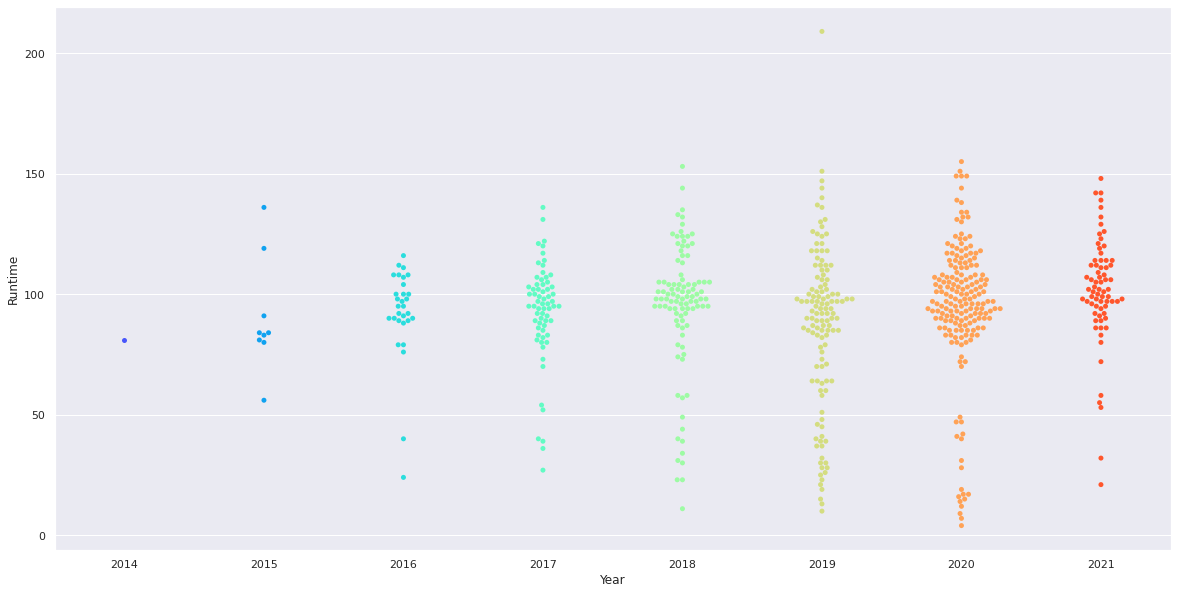

In [35]:
sns.swarmplot(x='Year', y='Runtime', data=movies, palette='rainbow')

### Consider the most common genre:

 - Documentary        159
 - Drama               77
 - Comedy              49
 - Romantic comedy     39
 - Thriller            33
 - Comedy-drama        14
 - Crime drama         11
 - Biopic               9
 - Horror               9
 - Action               7

In [36]:
top_genre = movies[((movies['Genre'] == 'Documentary')|(movies['Genre'] == 'Drama')|(movies['Genre'] == 'Comedy'))]
top_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 0 to 583
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       285 non-null    object 
 1   Genre       285 non-null    object 
 2   Runtime     285 non-null    int64  
 3   IMDB Score  285 non-null    float64
 4   Language    285 non-null    object 
 5   Year        285 non-null    int64  
 6   Month       285 non-null    object 
 7   Day         285 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 20.0+ KB


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


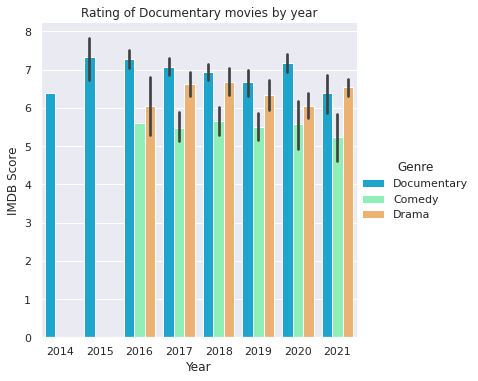

In [37]:
sns.factorplot(x='Year', y='IMDB Score', hue='Genre', data=top_genre, kind='bar', palette='rainbow')

plt.title('Rating of Documentary movies by year')
plt.xlabel('Year')
plt.ylabel('IMDB Score')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


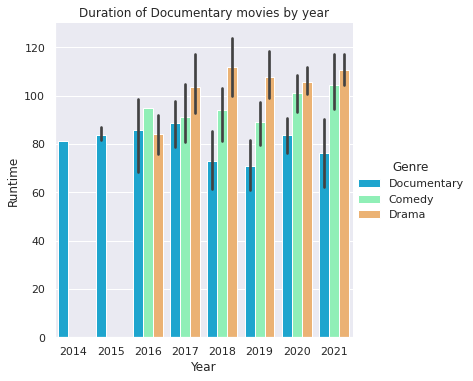

In [38]:
sns.set(rc={'figure.figsize':(16, 16)})

sns.factorplot(x='Year', y='Runtime', hue='Genre', data=top_genre, kind='bar', palette='rainbow')

plt.title('Duration of Documentary movies by year')
plt.xlabel('Year')
plt.ylabel('Runtime')
plt.show()

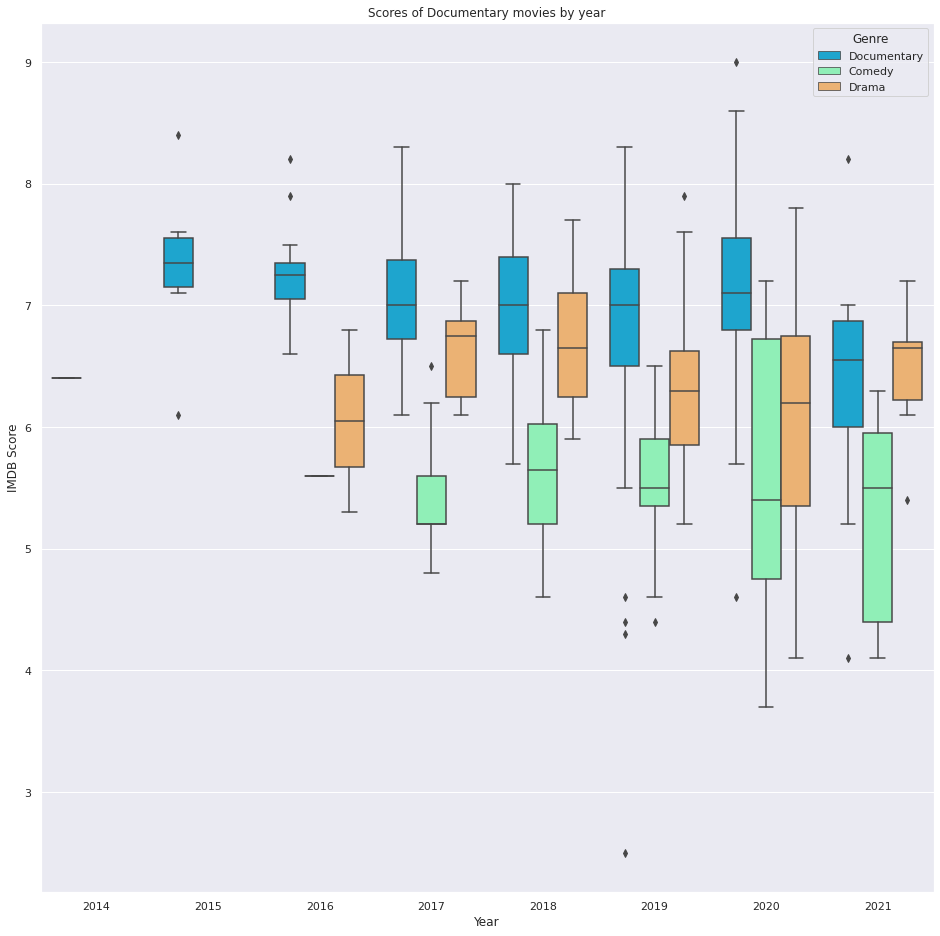

In [39]:
sns.boxplot(x="Year", y="IMDB Score", hue="Genre", palette='rainbow', data=top_genre)
plt.title('Scores of Documentary movies by year')
plt.xlabel('Year')
plt.ylabel('IMDB Score')
plt.show()